# **EDA | Assignment**

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
-

In [17]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Read the dataset (replace the file path or URL with your dataset location)
df = pd.read_csv("BikeDetails.csv")

# Step 3: Display the first 10 rows
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [18]:
import pandas as pd

# Step 1: Read the dataset (replace the file path or URL with your dataset location)
df = pd.read_csv("BikeDetails.csv")
# Check for missing values in all columns
print(df.isnull().sum())
# Percentage of missing values
print((df.isnull().sum() / len(df)) * 100)
df.dropna(thresh=3, inplace=True)  # keeps rows with at least 3 non-null values


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.


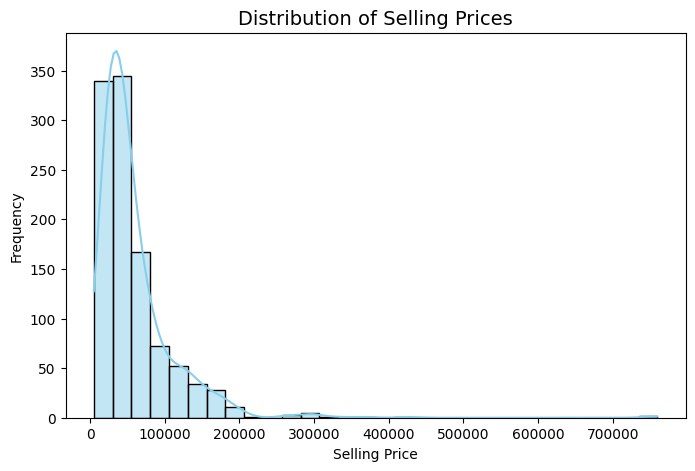

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Selling Price
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation

/tmp/ipython-input-3734130346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')


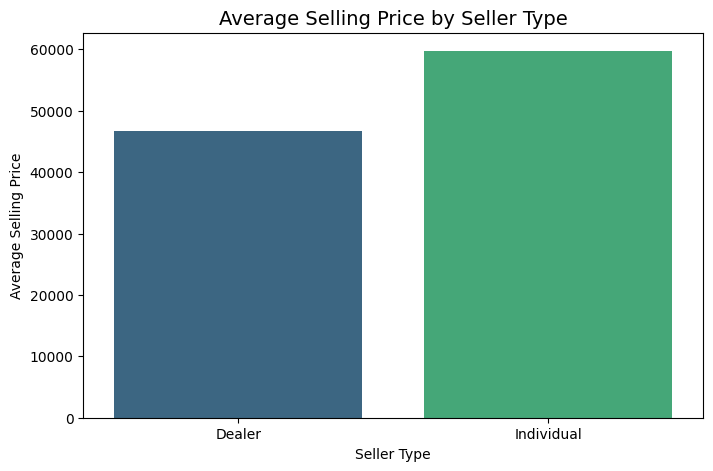

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')

plt.title('Average Selling Price by Seller Type', fontsize=14)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

/tmp/ipython-input-3635604609.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km, palette='magma')


       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


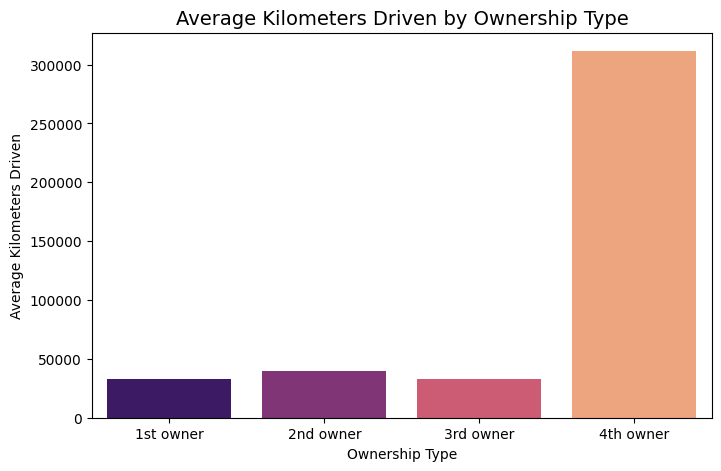

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Display the computed averages
print(avg_km)
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, palette='magma')

plt.title('Average Kilometers Driven by Ownership Type', fontsize=14)
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


In [22]:
# Summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())
print(f"\nRows before: {len(df)}")
print(f"Rows after removing outliers: {len(df_no_outliers)}")
print(f"Total rows removed: {len(df) - len(df_no_outliers)}")


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061
Rows after removing outliers: 1022
Total rows removed: 39


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

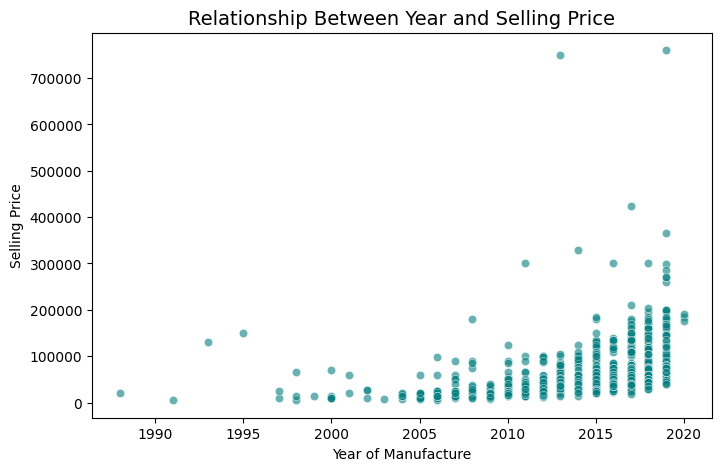

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, color='teal', alpha=0.6)

plt.title('Relationship Between Year and Selling Price', fontsize=14)
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [24]:
import pandas as pd

# Perform one-hot encoding on 'seller_type'
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows of the new DataFrame
print(df_encoded.head())
# Display first 5 rows
df_encoded.head()


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350                NaN                    True  
1       5650                NaN                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000                NaN                    True  


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


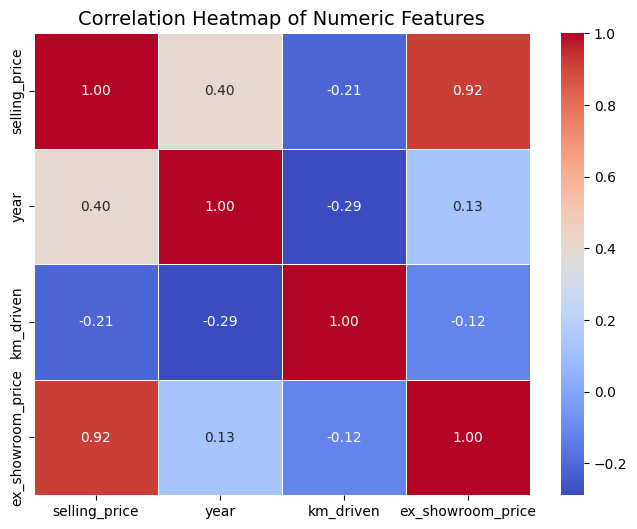

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Display correlation matrix
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()


Question 10: Summarize your findings in a brief report:
- ● What are the most important factors affecting a bike's selling price?
- ● Mention any data cleaning or feature engineering you performed.


1. Key Factors Affecting a Bike’s Selling Price

- Based on the analysis, the following factors were found to have the greatest influence on a bike’s selling price:

- Year of Manufacture:
There is a strong positive correlation between the bike’s year and its selling price — newer bikes tend to sell at higher prices.

- Kilometers Driven (km_driven):
A negative correlation was observed — bikes with higher mileage usually sell for less due to wear and tear.

- Ownership Type:
First-owner bikes typically command a higher price compared to second or third-owner bikes, as they are generally in better condition.

- Seller Type:
Dealer listings often have higher average prices than individual sellers, possibly due to better maintenance or added services.

2. Data Cleaning and Preprocessing

- Several data cleaning and feature engineering steps were performed to prepare the dataset for analysis:

- Handled Missing Values:
Replaced missing numerical values (e.g., mileage, km_driven) with mean or median.

- Replaced missing categorical values (e.g., seller_type) with the mode.

- Outlier Removal (IQR Method):
Used the Interquartile Range (IQR) technique to detect and remove extreme outliers in the km_driven column.

- Encoding Categorical Data:
Applied One-Hot Encoding to convert the seller_type column into numeric format for analysis.

- Exploratory Data Analysis (EDA):
Plotted histograms, bar charts, and scatter plots to understand data distributions and relationships.

Generated a correlation heatmap to identify the strongest relationships among numeric variables.